In [3]:
import pandas as pd
import glob

In [16]:
glob.glob('data/raw/*.csv')

['data/raw/HIST_PAINEL_COVIDBR_2021_Parte1_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2024_Parte1_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2021_Parte2_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2024_Parte2_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2020_Parte1_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2020_Parte2_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2023_Parte2_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2023_Parte1_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2022_Parte2_24ago2024.csv',
 'data/raw/HIST_PAINEL_COVIDBR_2022_Parte1_24ago2024.csv']

In [13]:
data = pd.concat([pd.read_csv(f, sep=";") for f in glob.glob('data/raw/*.csv')], ignore_index=True)

<Axes: xlabel='data'>

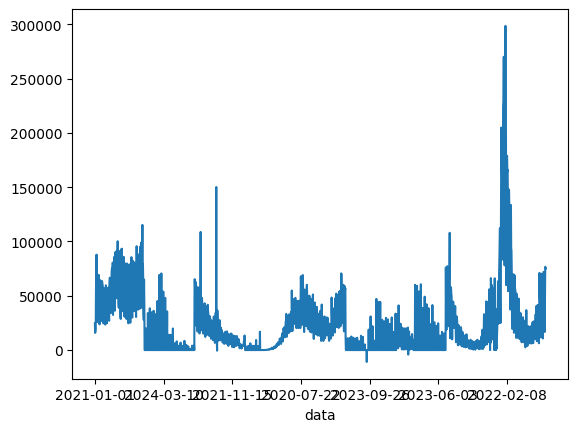

In [18]:
brazil = data[data.estado.isna()]
brazil.set_index('data', inplace=True)
brazil.casosNovos.plot()


/var/folders/kh/1sjhq9n90jsgjdsfxr1rsydc0000gn/T/ipykernel_36098/3379268483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rj['data'] = pd.to_datetime(rj['data'])
/var/folders/kh/1sjhq9n90jsgjdsfxr1rsydc0000gn/T/ipykernel_36098/3379268483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rj.sort_index(inplace=True)


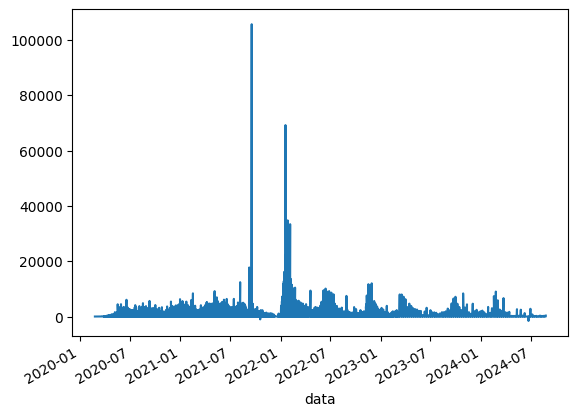

In [27]:
import matplotlib.dates as mdates 
rj = data[(data.estado == "RJ") & data.municipio.isna()]

rj['data'] = pd.to_datetime(rj['data'])
rj.set_index('data', inplace=True)
rj.sort_index(inplace=True)
rj
ax = rj.casosNovos.plot()

ax.xaxis.set_major_locator(mdates.AutoDateLocator())

  0%|          | 0/9058696 [00:00<?, ?it/s]

<BarContainer object of 3255 artists>

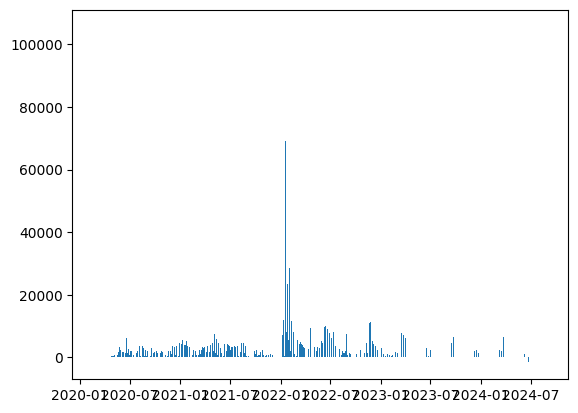

In [42]:
from datetime import datetime
import numpy as np
from tqdm.auto import tqdm

x = []
y = []

for idx, row in tqdm(data.iterrows(), total=len(data)):
    if row.estado == 'RJ' and pd.isnull(row.municipio):
        y_ = row.casosNovos 
        x_ = datetime.strptime(row.data,"%Y-%m-%d")
        x.append(x_)
        y.append(y_)
        

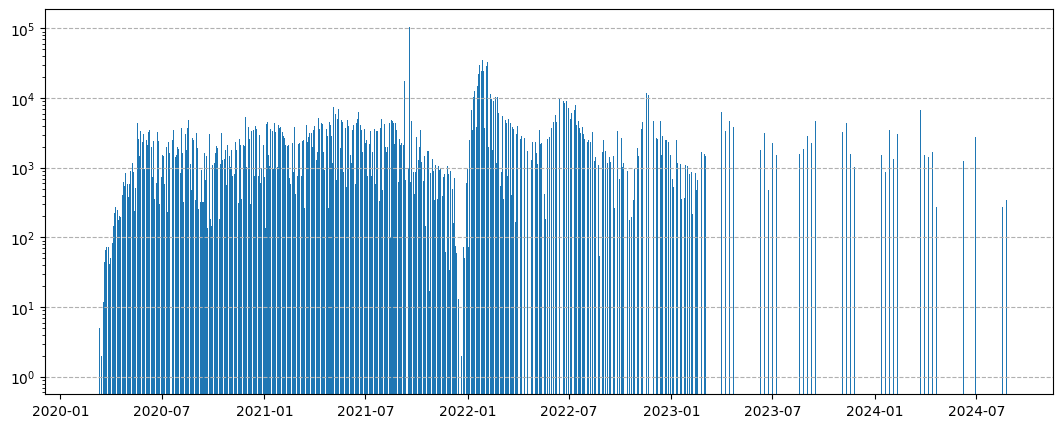

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(13, 5))
ax.bar(x, y)
ax.set_yscale('log')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.grid(True, which='major', ls='--')

In [59]:
data_numpy = data.values

rj_idx = np.where((data_numpy[:, 1] == 'RJ'))[0]
rj = data.values[rj_idx]
rj_state_idx = np.where(pd.isnull(rj[:, 2]))[0]

rj = rj[rj_state_idx, :]



array([['Sudeste', 'RJ', nan, ..., nan, nan, nan],
       ['Sudeste', 'RJ', nan, ..., nan, nan, nan],
       ['Sudeste', 'RJ', nan, ..., nan, nan, nan],
       ...,
       ['Sudeste', 'RJ', nan, ..., nan, nan, nan],
       ['Sudeste', 'RJ', nan, ..., nan, nan, nan],
       ['Sudeste', 'RJ', nan, ..., nan, nan, nan]], dtype=object)

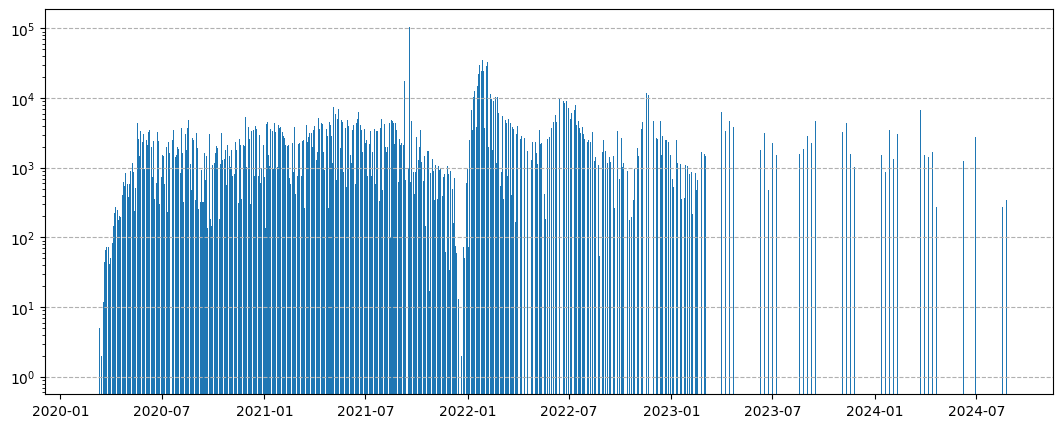

In [65]:
x = [datetime.strptime(value, '%Y-%m-%d') for value in rj[:, 7]]
y = rj[:, 11]

fig, ax = plt.subplots(1, 1, figsize=(13, 5))
ax.bar(x, y)

ax.set_yscale('log')

ax.xaxis.set_major_locator(mdates.AutoDateLocator())

ax.yaxis.grid(True, which='major', ls='--')